<a href="https://colab.research.google.com/github/nicolassalomon96/aprendizaje_maquina_UNS/blob/master/TP2/Ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 - Ejercicio 1

En https://github.com/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/data/casos_covid_bahia.csv
y https://github.com/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/data/camas_covid_bahia.csv
están datasets de la situación epidemiológica y sanitaria relacionada con el covid en Bahía Blanca en los últimos meses (fuente https://datos.bahia.gob.ar/dataset?groups=covid19).
Las variables son discretas (personas) pero se puede aplicar razonablemente el análisis estadístico como si fuesen valores continuos.
Hay variables que puedan ser razonablemente consideradas normales? Hay variables que tienen un comportamiento sospechoso?

## 1. Se importan librerias necesarias y se clonan los datasets del repositorio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Se instala el paquete subversion para clonar la carpeta data del repositorio de Github
!sudo apt-get install subversion
!svn export https://github.com/manlio99/Materia-de-aprendizaje.git/trunk/4_DataWrangling/data

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1
Suggested packages:
  db5.3-util libapache2-mod-svn subversion-tools
The following NEW packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 subversion
0 upgraded, 5 newly installed, 0 to remove and 40 not upgraded.
Need to get 2,237 kB of archives.
After this operation, 9,910 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libapr1 amd64 1.6.3-2 [90.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libaprutil1 amd64 1.6.1-2 [84.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libserf-1-1 amd64 1.3.9-6 [44.4 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libsvn1 amd64 1.9.7-4ubuntu1 [1,183 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/universe amd64 subversion amd64 1.9.7-4ubuntu1 

## 2. Inspección del dataset de casos de covid en Bahía Blanca



### 2.1. Muestra de datos

In [79]:
#Se lee y muestra el dataset de casos de covid en Bahía Blanca
path_covid_cases = '/content/data/casos_covid_bahia.csv'
covid_cases = pd.read_csv(path_covid_cases)

print("Datos de Covid en Bahía Blanca\n")
display(covid_cases)

#Columnas del Dataframe
#print(covid_cases.columns)

#Seleccionar una fila determinada
#row_1 = covid_cases.iloc[0]

#Seleccionar una columna determinada
#column = covid_cases['fecha']
#colum = covid_cases.loc[:,'fecha']

Datos de Covid en Bahía Blanca



,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0
2,2020-07-02,124,40,78,6,588,24,356,2162,176,0
3,2020-07-03,137,53,78,6,606,31,356,2353,190,0
4,2020-07-04,154,70,78,6,622,31,356,2377,214,0
...,...,...,...,...,...,...,...,...,...,...,...
83,2020-09-21,2589,1319,1209,61,3557,303,417,1261,510,0
84,2020-09-22,2714,1371,1282,61,3615,292,417,1197,554,0
85,2020-09-23,2841,1464,1313,64,3658,286,417,1206,562,0
86,2020-09-24,2906,1474,1366,66,3682,331,417,1221,562,0


### 2.2. Datos estadísticos

In [80]:
#Se muestran valores estadísticos del dataset
print("\nValores estadísticos del dataset")
display(covid_cases.describe())

print(f"\nTotal de casos de covid: {covid_cases['confirmados'].sum()}")

print(f"\nTotal de recuperados de covid: {covid_cases['recuperados'].sum()}")

print(f"\nTotal de decesos por covid: {covid_cases['decesos'].sum()}")



Valores estadísticos del dataset


,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.0
mean,944.977273,403.738636,516.238636,25.000000,2007.647727,157.613636,407.295455,1360.386364,287.920455,0.0
std,741.951512,377.382561,369.502430,16.613248,951.537510,101.144080,21.174241,289.810181,113.161691,0.0
min,106.000000,29.000000,71.000000,6.000000,574.000000,22.000000,342.000000,1014.000000,169.000000,0.0
25%,422.000000,201.250000,164.000000,13.000000,1159.250000,96.000000,417.000000,1215.000000,206.250000,0.0
50%,706.500000,238.000000,502.000000,20.000000,1999.500000,122.000000,417.000000,1280.000000,246.500000,0.0
75%,1262.750000,487.750000,742.250000,32.750000,2794.500000,232.250000,417.000000,1374.750000,370.500000,0.0
max,3012.000000,1512.000000,1434.000000,66.000000,3738.000000,382.000000,417.000000,2377.000000,625.000000,0.0



Total de casos de covid: 83158

Total de recuperados de covid: 45429

Total de decesos por covid: 2200


### 2.3. Gráfica de datos en función de la fecha

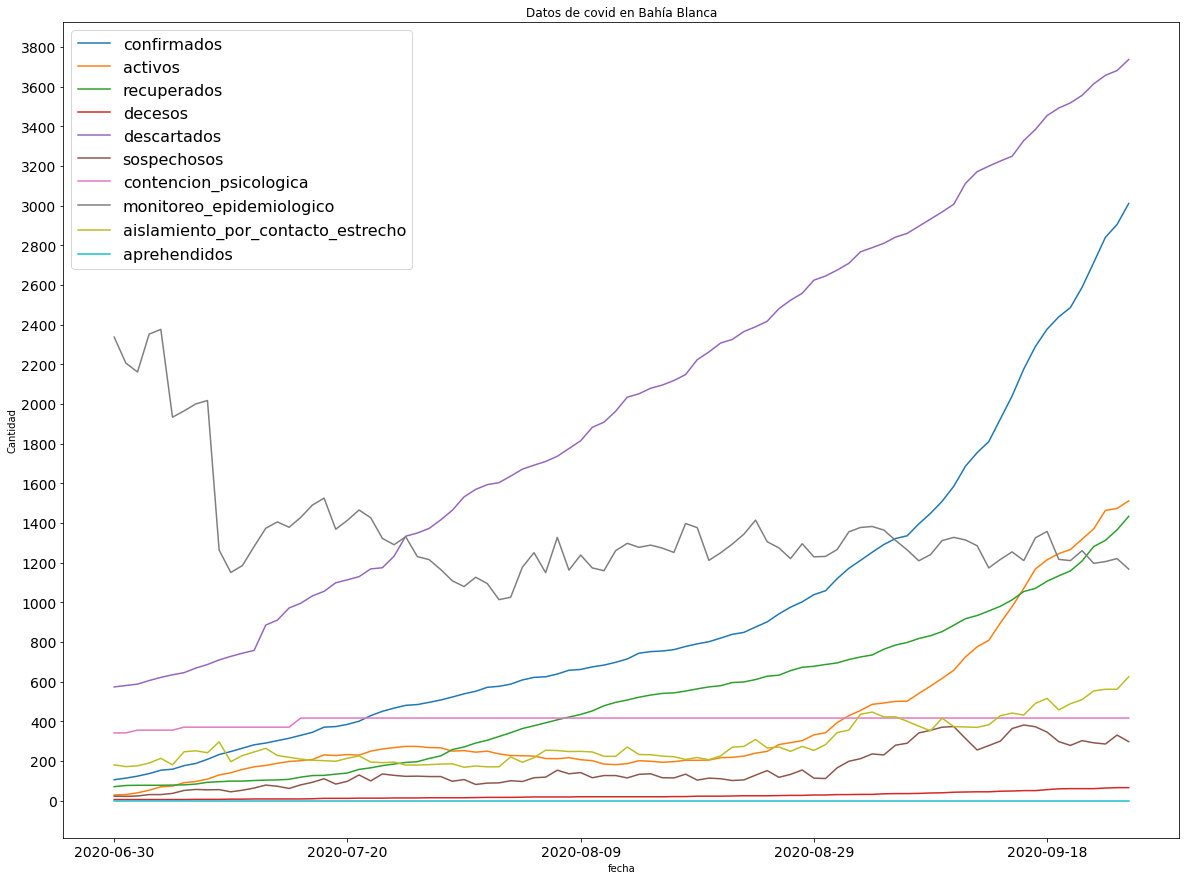

In [122]:
covid_cases.plot(kind='line', x='fecha', yticks=range(0,4000,200), ylabel='Cantidad', figsize=(20,15), title='Datos de covid en Bahía Blanca', fontsize=14).legend(loc=2, prop={'size': 16})

## 3. Inspección del dataset de camas ocupadas en Bahía Blanca

### 3.1. Muestra de datos

In [78]:
path_covid_beds = '/content/data/camas_covid_bahia.csv'
covid_beds = pd.read_csv(path_covid_beds)

#Dado que los datos estan dados desde los mas nuevos a los datos mas antiguos, se invierten para poder verse de forma mas clara
covid_beds = covid_beds.iloc[::-1]

print("Camas ocupadas por pacientes Covid en Bahía Blanca\n")
display(covid_beds)

Camas ocupadas por pacientes Covid en Bahía Blanca



,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
87,1,2020-06-30,848,347,40,155,15,10,16,32,1,143,23,0,0,137,0,3,NaN
86,7,2020-07-01,848,386,45,155,12,12,15,32,2,143,24,0,0,137,0,3,NaN
85,8,2020-07-02,848,358,42,155,14,14,18,32,4,143,25,0,0,137,0,3,NaN
84,9,2020-07-03,848,349,41,155,18,13,20,32,4,143,25,0,0,137,0,3,NaN
83,10,2020-07-04,848,343,40,155,14,14,18,32,3,143,22,0,0,137,0,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,127,2020-09-21,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4,NaN
3,128,2020-09-22,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4,NaN
2,129,2020-09-23,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4,NaN
1,130,2020-09-24,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN


### 3.2. Datos estadísticos

In [77]:
print("\nValores estadísticos del dataset")
display(covid_beds.describe())


Valores estadísticos del dataset


,informeNumero,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,70.670455,817.500000,350.159091,40.920455,162.068182,19.647727,34.909091,32.795455,31.636364,8.170455,137.181818,24.284091,39.943182,8.386364,144.159091,5.170455,3.715909
std,42.113072,155.002113,77.216502,9.006028,18.349603,6.586367,21.706843,15.509107,1.598719,7.014307,26.004220,8.541917,27.322408,7.529912,4.535648,4.334363,0.453565
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,137.000000,0.000000,3.000000
25%,30.750000,848.000000,325.750000,38.000000,163.000000,15.750000,20.000000,22.000000,32.000000,3.000000,142.000000,20.000000,0.000000,0.000000,137.000000,3.000000,3.000000
50%,87.500000,848.000000,367.500000,43.000000,163.000000,18.000000,25.000000,26.500000,32.000000,4.500000,142.000000,25.000000,54.000000,7.500000,147.000000,4.000000,4.000000
75%,109.250000,848.000000,391.000000,46.000000,163.000000,23.000000,52.250000,44.250000,32.000000,13.250000,142.000000,28.000000,62.000000,14.000000,147.000000,6.000000,4.000000
max,131.000000,851.000000,450.000000,53.000000,177.000000,42.000000,86.000000,77.000000,33.000000,24.000000,143.000000,43.000000,72.000000,25.000000,147.000000,21.000000,4.000000


### 3.3. Grafica de valores

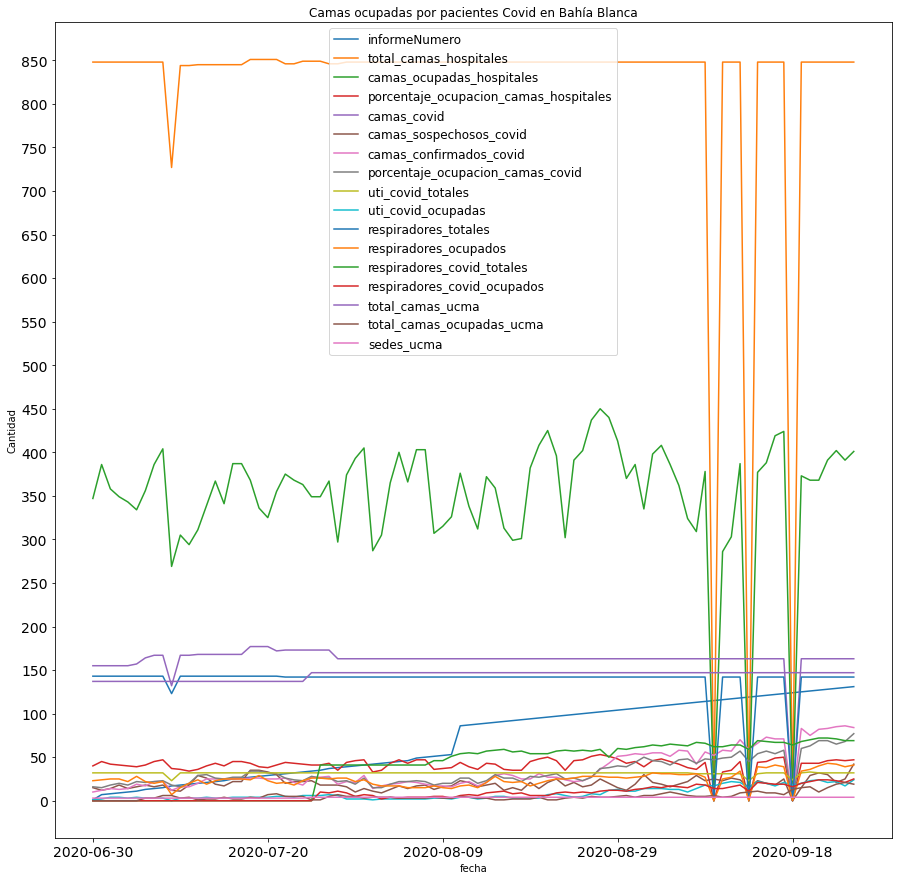

In [112]:
covid_beds.plot(figsize=(15,15), x='fecha', yticks=range(0,900,50), ylabel='Cantidad', title='Camas ocupadas por pacientes Covid en Bahía Blanca', fontsize=14).legend(loc=9, prop={'size': 12})


In [75]:
#df_mask = covid_beds['fecha'] == '2020-09-18'
#filtered_df = covid_beds[df_mask]
#filtered_df

In [73]:
covid_beds.iloc[len(covid_beds)-20:len(covid_beds)]


,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
19,112,2020-09-06,848,324,38,163,22,57,48,32,10,142,30,63,15,147,6,4,NaN
18,113,2020-09-07,848,309,36,163,29,42,43,31,14,142,31,67,19,147,5,4,NaN
17,114,2020-09-08,848,378,44,163,23,56,48,31,18,142,27,66,18,147,5,4,NaN
16,115,2020-09-09,0,0,0,163,25,52,47,31,17,0,0,62,14,147,6,4,Sin información del total de camas y del total...
15,116,2020-09-10,848,286,33,163,23,58,49,31,20,142,25,62,14,147,4,4,Sin información del total de camas y del total...
14,117,2020-09-11,848,303,35,163,26,57,50,31,22,142,27,64,16,147,5,4,Hospital Penna informó solo COVID
13,118,2020-09-12,848,387,45,163,24,70,57,31,21,142,34,64,18,147,9,4,NaN
12,119,2020-09-13,0,0,0,163,15,59,45,23,15,0,0,59,11,147,10,4,- El Hospital Municipal no brindó información ...
11,120,2020-09-14,848,377,44,163,23,66,54,31,22,142,39,69,21,147,11,4,NaN
10,121,2020-09-15,848,388,45,163,20,73,57,32,20,142,38,68,20,147,9,4,NaN


## Total de Camas vs Ocupadas por covid

[]

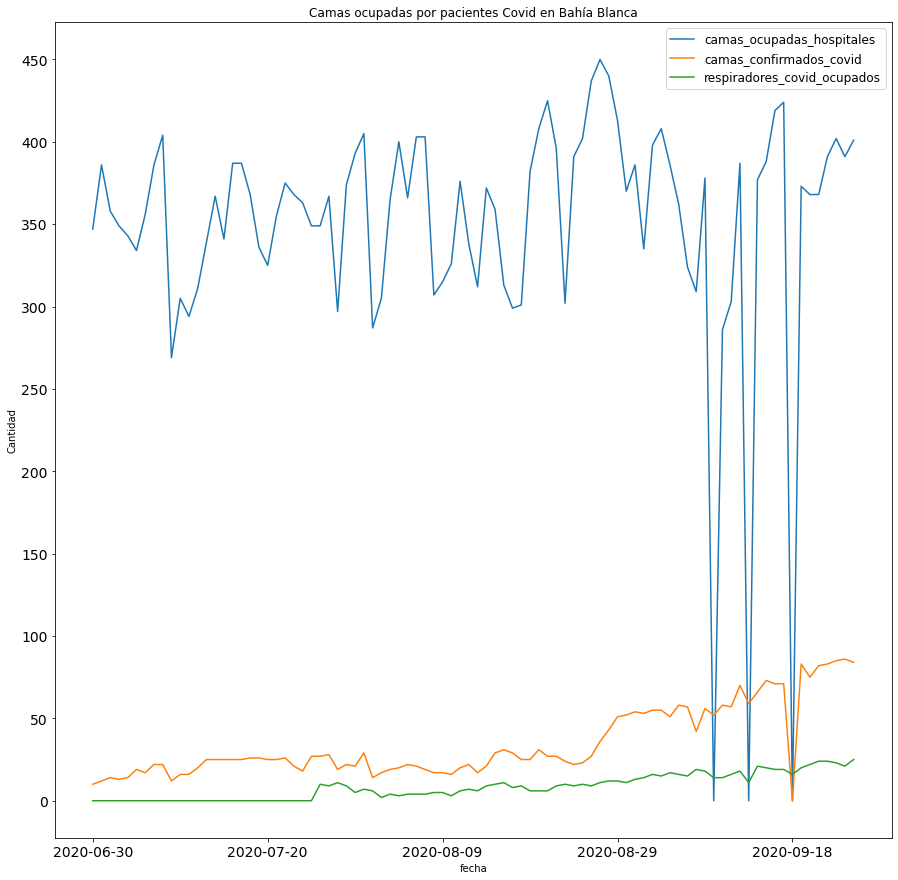

In [132]:
covid_beds.plot(figsize=(15,15), x='fecha', y=['camas_ocupadas_hospitales','camas_confirmados_covid','respiradores_covid_ocupados'], yticks=range(0,900,50), ylabel='Cantidad', title='Camas ocupadas por pacientes Covid en Bahía Blanca', fontsize=14).legend(loc='best', prop={'size': 12})
plt.plot()


## Casos de Covid vs Camas ocupadas por covid

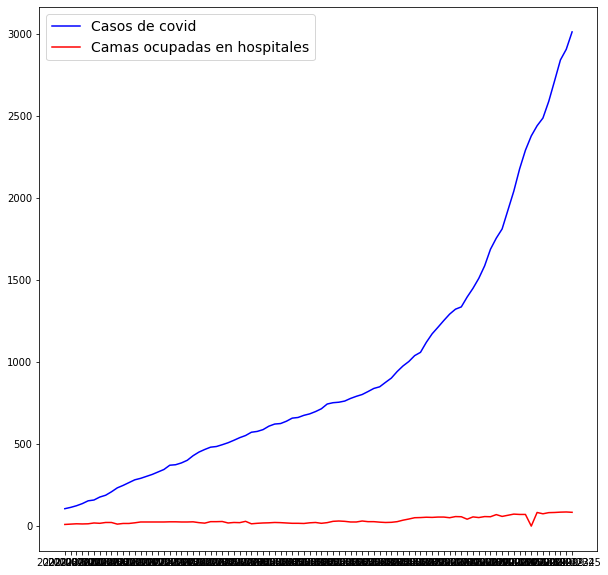

In [152]:
fig, axs = plt.subplots(1, figsize=(10,10))
plt.plot(covid_cases['fecha'],covid_cases['confirmados'], color='blue',label='Casos de covid')
plt.plot(covid_cases['fecha'],covid_beds['camas_confirmados_covid'], color='red', label='Camas ocupadas en hospitales')
plt.legend(prop={'size': 14})
plt.show()


No handles with labels found to put in legend.


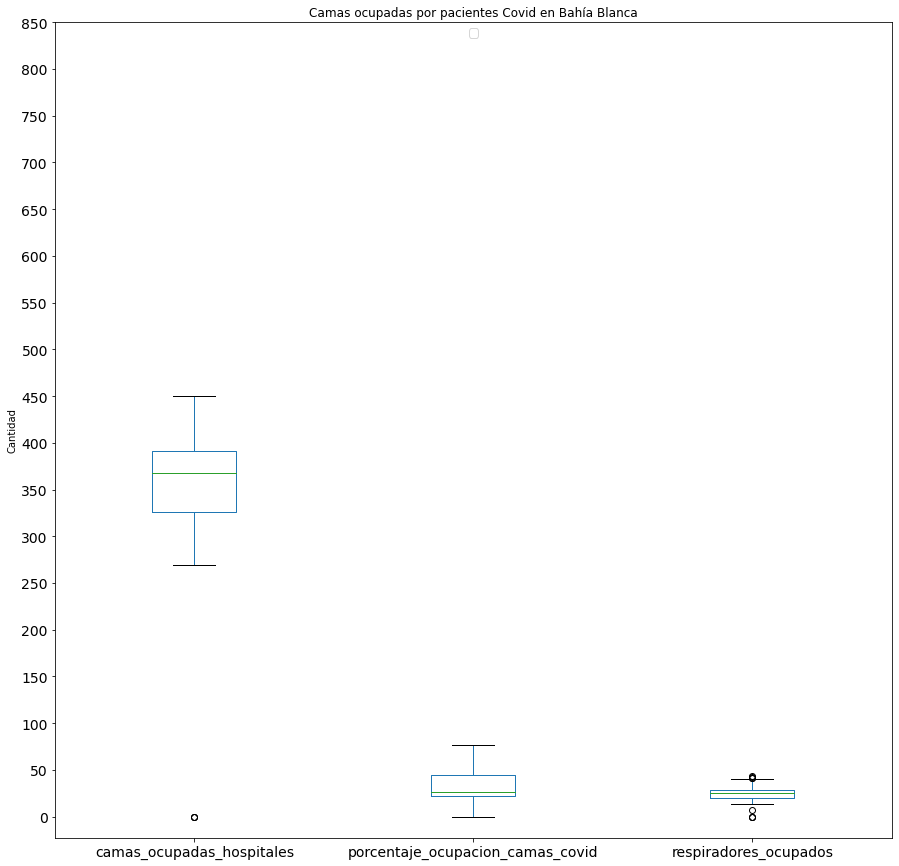

In [157]:
covid_beds.plot(kind='box',figsize=(15,15), x='fecha', y=['camas_ocupadas_hospitales', 'porcentaje_ocupacion_camas_covid', 'respiradores_ocupados'], yticks=range(0,900,50), ylabel='Cantidad', title='Camas ocupadas por pacientes Covid en Bahía Blanca', fontsize=14).legend(loc=9, prop={'size': 12})
